# Satanderd scaller & Normalization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# Import scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
# load_data from sns
data=sns.load_dataset('titanic')

In [4]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
data2=data[['survived','pclass','age']]

In [6]:
data2

,survived,pclass,age
0,0,3,22.0
1,1,1,38.0
2,1,3,26.0
3,1,1,35.0
4,0,3,35.0
...,...,...,...
886,0,2,27.0
887,1,1,19.0
888,0,3,NaN
889,1,1,26.0


In [7]:
data2['age']=data2['age'].fillna(data2['age'].mean())

/tmp/ipykernel_187513/3749598506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['age']=data2['age'].fillna(data2['age'].mean())


In [8]:
data2['pclass']=data2['pclass'].fillna(data2['pclass'].mean())

/tmp/ipykernel_187513/3584439454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['pclass']=data2['pclass'].fillna(data2['pclass'].mean())


In [9]:
# here we can see the survived column is a dependent var so it wll be removed from the data before preprocessing
X_metrics=data2.drop(columns=['survived'],axis=1)
y=data2['survived']

In [10]:
# Now split both datasets into train and test
X_train,X_test,y_train,y_test=train_test_split(X_metrics,y,test_size=0.2,random_state=34)

In [11]:
print(
X_train.shape,
X_test.shape,
y_train.shape,
y_test.shape)
train_columns=X_train.columns
test_columns=X_test.columns

(712, 2) (179, 2) (712,) (179,)


In [12]:
# Now data is in the processibe form
X_sc=StandardScaler()
X_sc.fit(X_train)

StandardScaler()

In [13]:
X_sc.mean_

array([ 2.30617978, 29.80448942])

In [14]:
#Now Transform Values into dataset
X_sc_train=X_sc.transform(X_train)
X_sc_test=X_sc.transform(X_test)
# It always backs an array

In [15]:
# convert it into dataset
X_sc_dataset_train=pd.DataFrame(X_sc_train,columns=[train_columns])
X_sc_dataset_test=pd.DataFrame(X_sc_test,columns=[test_columns])

In [16]:
X_sc_dataset_train


,pclass,age
0,-0.367859,0.090727
1,0.833589,-0.061052
2,-0.367859,-0.212832
3,0.833589,-0.007997
4,0.833589,-0.819949
...,...,...
707,0.833589,0.318396
708,0.833589,1.304961
709,0.833589,-0.007997
710,-0.367859,0.204561


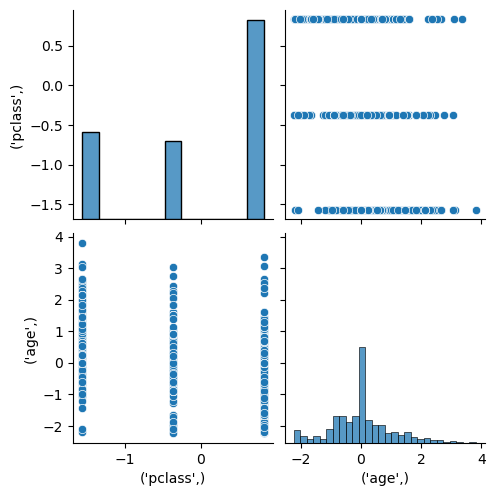

In [59]:
sns.pairplot(X_sc_dataset_train)

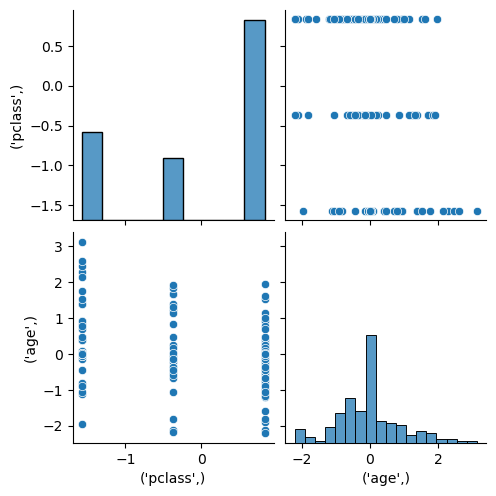

In [58]:
sns.pairplot(X_sc_dataset_test)

/tmp/ipykernel_187513/933318040.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['age'])


<Axes: xlabel='age', ylabel='Density'>

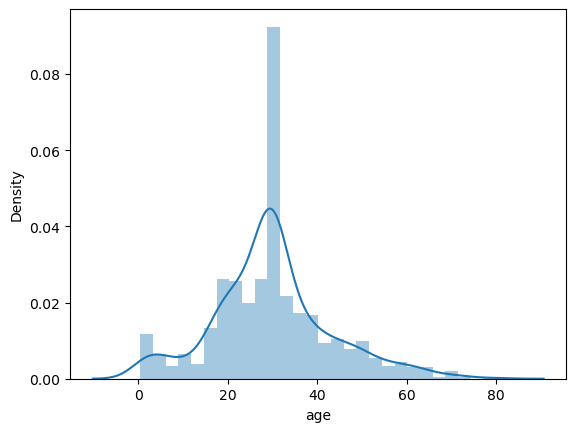

In [69]:
sns.distplot(X_train['age'])

In [24]:
# Min Max Scaler

# Min Max Scaler

In [29]:
mms=MinMaxScaler()
mms.fit(X_train)

MinMaxScaler()

In [32]:
X_train_mms=mms.transform(X_train)

In [34]:
X_test_mms=mms.transform(X_test)

In [42]:
Final_data_X_train_min_max_scaler=pd.DataFrame(X_train_mms,columns=train_columns)
Final_data_X_test_min_max_scaler=pd.DataFrame(X_test_mms,columns=test_columns)

In [43]:
Final_data_X_train_min_max_scaler

,pclass,age
0,1.0,0.367921
1,0.0,0.447097
2,1.0,0.208344
3,0.5,0.648153
4,0.0,0.434531
...,...,...
174,1.0,0.367921
175,1.0,0.535059
176,0.0,0.798944
177,1.0,0.004147


In [44]:
Final_data_X_test_min_max_scaler

,pclass,age
0,1.0,0.367921
1,0.0,0.447097
2,1.0,0.208344
3,0.5,0.648153
4,0.0,0.434531
...,...,...
174,1.0,0.367921
175,1.0,0.535059
176,0.0,0.798944
177,1.0,0.004147


In [46]:
Final_data_X_test_min_max_scaler.describe().round(2)

,pclass,age
count,179.00,179.00
mean,0.66,0.36
std,0.43,0.15
min,0.00,0.00
25%,0.25,0.28
50%,1.00,0.37
75%,1.00,0.42
max,1.00,0.89


In [47]:
Final_data_X_train_min_max_scaler.describe().round(2)

,pclass,age
count,179.00,179.00
mean,0.66,0.36
std,0.43,0.15
min,0.00,0.00
25%,0.25,0.28
50%,1.00,0.37
75%,1.00,0.42
max,1.00,0.89


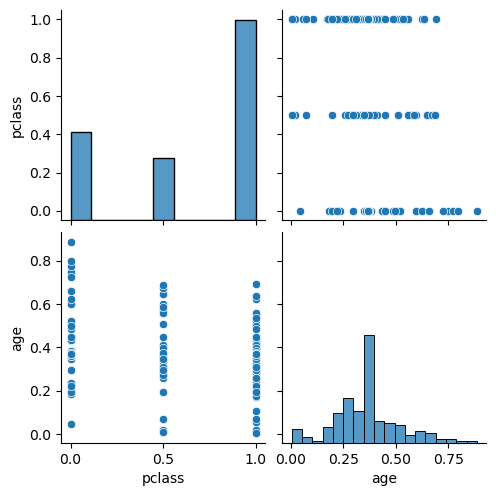

In [48]:
sns.pairplot(Final_data_X_train_min_max_scaler)

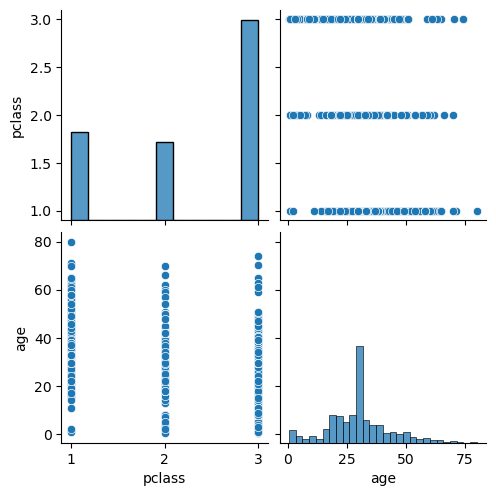

In [50]:
sns.pairplot(X_train)

/tmp/ipykernel_187513/1323423528.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Final_data_X_train_min_max_scaler['age'])


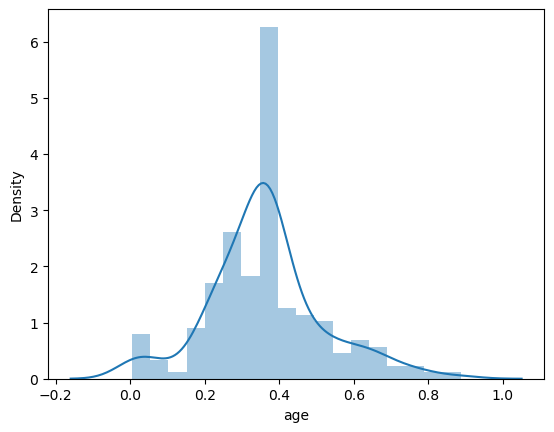

In [65]:
sns.distplot(Final_data_X_train_min_max_scaler['age'])
plt.show()

/tmp/ipykernel_187513/933318040.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['age'])


<Axes: xlabel='age', ylabel='Density'>

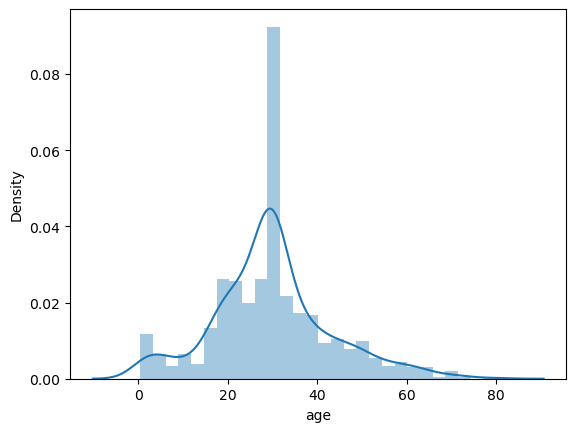

In [71]:
sns.distplot(X_train['age'])

# Dhanyawaad